In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("/data.csv")
data.drop(["Unnamed: 32"],axis=1,inplace=True)
display(data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data1=data.copy()
def classifier(data1):
    if data1["diagnosis"]=="M":
        return "1"
    else:
        return "0"
data1["diagnosis"] = data1.apply(classifier, axis=1) 
data1.replace([np.inf, -np.inf], np.nan, inplace=True) 
data1["diagnosis"]=pd.to_numeric(data1["diagnosis"],errors="coerce") 

# __Data Preprocessing__ 

In [4]:
print(data1.columns,data.shape)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') (569, 32)


In [ ]:
#Log transform
def log_transform(col):
    return np.log(col[0])

data1["compactness_mean"]=data1[["compactness_mean"]].apply(log_transform, axis=1)
data1["concavity_mean"]=data1[["concavity_mean"]].apply(log_transform, axis=1)
data1["concave points_mean"]=data1[["concave points_mean"]].apply(log_transform, axis=1)
data1["radius_se"]=data1[["radius_se"]].apply(log_transform, axis=1)
data1["perimeter_se"]=data1[["perimeter_se"]].apply(log_transform, axis=1)
data1["smoothness_se"]=data1[["smoothness_se"]].apply(log_transform, axis=1)
data1["compactness_se"]=data1[["compactness_se"]].apply(log_transform, axis=1)
data1["concavity_se"]=data1[["concavity_se"]].apply(log_transform, axis=1)
data1["symmetry_se"]=data1[["symmetry_se"]].apply(log_transform, axis=1)
data1["fractal_dimension_se"]=data1[["fractal_dimension_se"]].apply(log_transform, axis=1)
data1["area_worst"]=data1[["area_worst"]].apply(log_transform, axis=1)
data1["compactness_worst"]=data1[["compactness_worst"]].apply(log_transform, axis=1)
data1["concavity_worst"]=data1[["concavity_worst"]].apply(log_transform, axis=1)

**Split data into training and testing sets**

In [5]:
X=data1.iloc[:,2:32]
Y=data1.iloc[:,1]

for col in X.columns:
    X[col][np.isinf(X[col])]=X[col].mean()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [6]:
selected_features=data1.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index
X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [7]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

##Support Vector Machine

In [17]:
svm=SVC(kernel="rbf",random_state=0)
svm.fit(X_train,Y_train)

SVC(random_state=0)

In [18]:
Y_pred=svm.predict(X_test)

Precision: 1.0 
Recall: 0.957 
F1-Score: 0.978 
Accuracy: 98.25% 



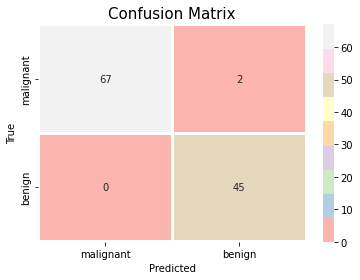

In [19]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
SVM_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), SVM_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()